# Telecom Customer Churn

WELCOME TO EXAM MODULE 3! :) You're super great that you're here already. Now, buckle up!

Data yang digunakan pada exam ini adalah data Customer Churn dari suatu perusahaan telekomunikasi.

Customer Churn adalah fenomena ketika customer pergi meninggalkan produk kita. Tentu kita tidak menginginkan customer untuk berhenti menggunakan produk kita, kan? 

Inilah tantangannya! Kita akan mencoba memprediksi apakah customer akan churn atau tidak. 

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

<b> Coloumns Descriptions  </b>
- customerID = Customer ID
- gender = Whether the customer is a male or a female
- SeniorCitizen = Whether the customer is a senior citizen or not (1, 0)
- Partner = Whether the customer has a partner or not (Yes, No)
- Dependents = Whether the customer has dependents or not (Yes, No)
- tenure = Number of months the customer has stayed with the company
- PhoneService = Whether the customer has a phone service or not (Yes, No)
- MultipleLines = Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService = Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity = Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup = Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection = Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport = Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV = Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies = Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract = The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling = Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod = The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges = The amount charged to the customer monthly
- TotalCharges = The total amount charged to the customer
- Churn = Whether the customer churned or not (Yes or No)

In this exam, the maximum point is 100 with the criterion is shown below:
- Q1 Data Preparation: 15 point
- Q2 Data Visualization: 35 point
- Q3 Classification Modelling: 20 point
- Q4 Perbaikan Modelling: 30 point

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score, precision_score

In [188]:
df = pd.read_csv('Churn_ujian.csv')

In [189]:
df=pd.read_csv(r"/content/Churn_ujian.csv")

In [171]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# tulislah code yang mengeluarkan output seperti di bawah ini

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# tulislah code yang mengeluarkan output seperti di bawah ini

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# tulislah code yang mengeluarkan output seperti di bawah ini

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [22]:
df["tenure"].value_counts(ascending=False)

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [177]:
customdesc =[]
for item in df.columns :
    customdesc.append([item,df[item].count(), df[item].nunique(), df[item].value_counts().idxmax(), df[item].value_counts(ascending=False).iloc[0]])
pd.DataFrame(customdesc, columns = ['','count','unique', 'top', 'freq']).set_index("")

,count,unique,top,freq
,,,,
customerID,7043,7043,3874-EQOEP,1
gender,7043,2,Male,3555
SeniorCitizen,7043,2,0,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
tenure,7043,73,1,613
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096


In [ ]:
# tulislah code yang mengeluarkan output seperti di bawah ini

,count,unique,top,freq
customerID,7043,7043,3648-GZPHF,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [26]:
custdesc =[]
for item in df.columns :
    custdesc.append([item,df[item].dtypes, df[item].isna().sum(), round((df[item].isna().sum()/len(df))*100,2),
                  df[item].nunique(),df[item].drop_duplicates().sample(2).values])
pd.DataFrame(custdesc, columns = ['dataFeatures','dataType','null','nullPct','unique','uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,customerID,object,0,0.0,7043,"[8563-IIOXK, 8966-OIQHG]"
1,gender,object,0,0.0,2,"[Male, Female]"
2,SeniorCitizen,int64,0,0.0,2,"[0, 1]"
3,Partner,object,0,0.0,2,"[Yes, No]"
4,Dependents,object,0,0.0,2,"[Yes, No]"
5,tenure,int64,0,0.0,73,"[30, 72]"
6,PhoneService,object,0,0.0,2,"[No, Yes]"
7,MultipleLines,object,0,0.0,3,"[No, Yes]"
8,InternetService,object,0,0.0,3,"[No, Fiber optic]"
9,OnlineSecurity,object,0,0.0,3,"[No internet service, Yes]"


In [ ]:
# tulislah code yang mengeluarkan output seperti di bawah ini

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,customerID,object,0,0.0,7043,"[5149-QYTTU, 4695-WJZUE]"
1,gender,object,0,0.0,2,"[Male, Female]"
2,SeniorCitizen,int64,0,0.0,2,"[0, 1]"
3,Partner,object,0,0.0,2,"[No, Yes]"
4,Dependents,object,0,0.0,2,"[Yes, No]"
5,tenure,int64,0,0.0,73,"[2, 33]"
6,PhoneService,object,0,0.0,2,"[Yes, No]"
7,MultipleLines,object,0,0.0,3,"[Yes, No]"
8,InternetService,object,0,0.0,3,"[Fiber optic, DSL]"
9,OnlineSecurity,object,0,0.0,3,"[No, No internet service]"


#Q1: Data Preparation (15 point)

## 1. Ubahlah format dari kolom yang menurutmu perlu diubah! (Perlu diingat bahwa untuk membuat modelling machine learning diperlukan data yang memiliki format numerik seluruhnya).
## 2. Adakah missing value pada data tersebut? Jika ada, apakah perlu dilakukan penghapusan missing value?
## 3. Lakukan step data preparation APAPUN yang belum dilakukan di nomor 1 dan 2 di atas.


In [ ]:
# Tulis jawaban Q1 di cell ini. TIDAK TERBATAS HANYA 1 CELL SAJA. Jika kurang, silahkan tambah cell sesuai kebutuhan.

### Q1.1

Cek jenis data mana aja yang numerik mana yang kategorik

In [28]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


dari data describe, maka bisa mengetahui yang mana saja yang saat ini tercatat sebagai data numerik. namun, saya hendak mengetahui lebih lanjut apakah penentuan datatype ini sudah sesuai dengan seharusnya.

In [27]:
for i in df.columns:
    print (i,"---",df[i].nunique(),"---",df[i].unique())

customerID --- 7043 --- ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender --- 2 --- ['Female' 'Male']
SeniorCitizen --- 2 --- [0 1]
Partner --- 2 --- ['Yes' 'No']
Dependents --- 2 --- ['No' 'Yes']
tenure --- 73 --- [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService --- 2 --- ['No' 'Yes']
MultipleLines --- 3 --- ['No phone service' 'No' 'Yes']
InternetService --- 3 --- ['DSL' 'Fiber optic' 'No']
OnlineSecurity --- 3 --- ['No' 'Yes' 'No internet service']
OnlineBackup --- 3 --- ['Yes' 'No' 'No internet service']
DeviceProtection --- 3 --- ['No' 'Yes' 'No internet service']
TechSupport --- 3 --- ['No' 'Yes' 'No internet service']
StreamingTV --- 3 --- ['No' 'Yes' 'No internet service']
StreamingMovies --- 3 --- ['No' 'Yes' 'No internet service']
Contract --- 3 --- 

Looking at the data, it seems that SeniorCitizen should not be a numerical values (only 0 or 1) and TotalCharges should be numerical values!

### Q1.3

saya ingin melompat ke jawaban point ke-3 terlebih dahulu, dimana saya akan drop kolom "customerID", yang tidak akan digunakan dalam melakukan modeling machine learning dikarenakan tidak memberikan info apapun yang berguna sebagai suatu fitur

In [178]:
df.drop("customerID", axis=1, inplace=True)

In [31]:
df_num=df[["MonthlyCharges","tenure","TotalCharges"]]
df_cat=df.drop(["MonthlyCharges","tenure","TotalCharges"], axis=1)

data kategorik akan diubah dengan menggunakan one hot encoder, dimulai dengan listing kolom data mana saja yang kategorik

In [32]:
df_cat.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

Churn sebagai kolom target tidak diikutsertakan dalam one hot encoding

In [33]:
df = pd.get_dummies(df,columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],drop_first=True)

cek apakah masih ada data yang tidak numerik 

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   int64  
 1   MonthlyCharges                         7043 non-null   float64
 2   TotalCharges                           7043 non-null   object 
 3   Churn                                  7043 non-null   object 
 4   gender_Male                            7043 non-null   uint8  
 5   SeniorCitizen_1                        7043 non-null   uint8  
 6   Partner_Yes                            7043 non-null   uint8  
 7   Dependents_Yes                         7043 non-null   uint8  
 8   PhoneService_Yes                       7043 non-null   uint8  
 9   MultipleLines_No phone service         7043 non-null   uint8  
 10  MultipleLines_Yes                      7043 non-null   uint8  
 11  Inte

hanya tersisa Total Charges dan Churn yang belum berupa data numerik, maka akan diubah berikut ini

pertama-tama mengubah data churn terlebih dahulu

In [37]:
df["Churn"]

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [35]:
df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

saat ini masih berupa Yes dan No harus diubah menjadi 0 dan 1.
0: TIDAK CHURN, 1: CHURN

In [179]:
labelencoder=LabelEncoder()
df["Churn"]=labelencoder.fit_transform(df["Churn"])
df["Churn"]

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

selanjutnya mengubah datatype TotalCharges

In [39]:
df["TotalCharges"]=df["TotalCharges"].astype("float")

ValueError: ignored

terlihat adanya data string kosong sehingga terjadi error, maka harus disesuaikan terlebih dahulu

### Q1.2

hanya ada 11 data kosong, tidak terlalu signifikan, maka saya putuskan untuk drop saja

In [180]:
df.drop(df[df["TotalCharges"]==" "].index, inplace=True)

In [181]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [182]:
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7032 non-null   int64  
 1   MonthlyCharges                         7032 non-null   float64
 2   TotalCharges                           7032 non-null   float64
 3   Churn                                  7032 non-null   int64  
 4   gender_Male                            7032 non-null   uint8  
 5   SeniorCitizen_1                        7032 non-null   uint8  
 6   Partner_Yes                            7032 non-null   uint8  
 7   Dependents_Yes                         7032 non-null   uint8  
 8   PhoneService_Yes                       7032 non-null   uint8  
 9   MultipleLines_No phone service         7032 non-null   uint8  
 10  MultipleLines_Yes                      7032 non-null   uint8  
 11  Inte

### Q1.3 : cek multikol untuk variabel yang memang numerik, bukan kategorik yg dijadiin numerik

In [65]:
df_num=df[["MonthlyCharges","tenure","TotalCharges"]]

In [66]:
df_num.corr()

,MonthlyCharges,tenure,TotalCharges
MonthlyCharges,1.000000,0.246862,0.651065
tenure,0.246862,1.000000,0.825880
TotalCharges,0.651065,0.825880,1.000000


terlihat multikol yang kuat antara total charges dengan variabel lain. selain itu, masuk akal bahwa total charges adalah tenure x monthly charges,sehingga dapat didrop saja.

In [67]:
df.drop("TotalCharges", axis=1, inplace=True)

#Q2: Data Visualization (35 point)

##1. Tampilkan visualisasi LINE CHART variabel apapun yang kamu inginkan. Lalu, analisis hasilnya.

##2. Tampilkan visualisasi BOX PLOT dari variabel apapun yang kamu inginkan TERHADAP target variabel "Churn Or Not Churn". Lalu, analisis hasilnya. CONTOH GAMBARANNYA SEPERTI DI BAWAH INI.
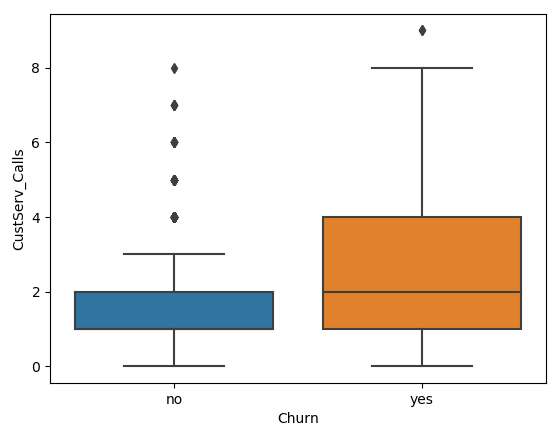

##3. Tampilkan visualisasi HISTOGRAM dengan variabel apapun yang kamu inginkan TERHADAP target variabel "Churn Or Not Churn". CONTOH GAMBAR SEBAGAI BERIKUT.

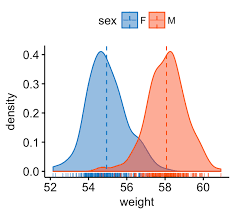


In [ ]:
# Tulis jawaban Q2 di cell ini. TIDAK TERBATAS HANYA 1 CELL SAJA. Jika kurang, silahkan tambah cell sesuai kebutuhan.

### Q2.1

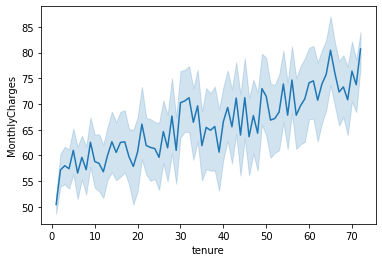

In [69]:
sns.lineplot(x="tenure", y="MonthlyCharges", data=df)

terlihat bahwa semakin panjang tenure, semakin besar rata-rata biaya bulanan yang harus dibayarkan. hal ini mungkin dikarenakan adanya promo-promo yang diberikan untuk pengguna baru sementara pengguna lama sudah membayar dengan biaya non-promo. 

### Q2.2

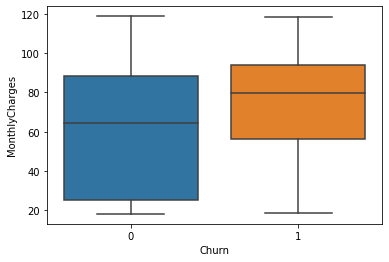

In [61]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)

dari boxplot di atas, terlihat bahwa adanya kecenderungan customer untuk beralih (churn) seiring semakin besarnya Monthly Charges (rata-rata biaya per bulan). persebaran datanya pun untuk customer yang beralih lebih banyak di area atas (yaitu, rata-rata biaya per bulan yang tinggi) dibandingkan dengan customer yang tidak beralih). Maka, dapat dipertimbangkan bahwa besarnya biaya per bulan yang dikenakan kepada customer dapat mempengaruhi kesetiaan customer terhadap service yang kita berikan.

### Q2.3

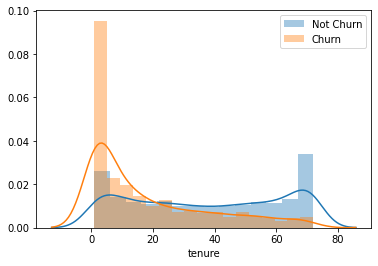

In [79]:
sns.distplot(df[df["Churn"]==0]["tenure"], label="Not Churn")
sns.distplot(df[df["Churn"]==1]["tenure"], label="Churn")
plt.legend()

melalui histogram di atas, dapat kita lihat bahwa secara signifikan lebih banyak customer yang beralih di awal penggunaan service daripada mereka yang telah lama menggunakannya. 

#Q3: Classification Modelling (20 point)

## **Tujuan**: Memprediksi apakah customer akan churn atau tidak churn. Kolom target variabel berjudul "Churn".

## **Metric evaluation**: Tergantung pembuat modelling, yaitu kamu. Gunakan alasan yang tepat mengapa memilih metric evaluation tersebut. Beberapa contoh metric evaluation -> Accuracy, Precision, Recall, etc.

## **Algoritma**: Buatlah modelling dengan minimal 2 algoritma yang berbeda. Contoh: Logistic regression & random forest. Semakin banyak algoritma yang digunakan, maka semakin bisa membandingkan kebaikan model tersebut.

## **Expected Output**: Modelling & metric evaluation.



In [ ]:
# Tulis jawaban Q3 di cell ini. TIDAK TERBATAS HANYA 1 CELL SAJA. Jika kurang, silahkan tambah cell sesuai kebutuhan.

In [80]:
x=df.drop("Churn", axis=1)
y=df["Churn"]

In [81]:
x

,tenure,MonthlyCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,2,53.85,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,2,70.70,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1
7039,72,103.20,0,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0
7040,11,29.60,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7041,4,74.40,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [82]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

membagi data menjadi train dan test

In [83]:
x_train, x_test, y_train, y_test= train_test_split(x,y,stratify=y, random_state=101, test_size=0.2)

metric evaluation yang akan saya gunakan di sini adalah akurasi, dengan pertimbangan bahwa jika terlalu banyak False Negative (terdapat banyak cust yang kita duga akan setia, ternyata churn), maka cost yang terjadi adalah berkurangnya customer dan menurunnya income. Sebaliknya, jika terlalu banyak False Positive (terdapat banyak cust yang kita duga akan churn, ternyata tetap setia), maka biaya marketing yang telah dikeluarkan menjadi percuma. Untuk itu, Recall/Precision tidak begitu cocok menurut saya dalam kasus ini. (walaupun, mungkin nantinya bisa dibahas lebih lanjut dengan tim, apabila ada salah satu cost yang lebih signifikan).

untuk percobaan awal, maka dapat menggunakan baseline modeling terlebih dahulu. saya akan menggunakan :
1. Logistic Regression (linear)
2. Random Forest (bagging)
3. Gradient Boosting (boosting)

#### LOGISTIC REGRESSION - BASELINE MODEL

In [88]:
logreg_base=LogisticRegression(random_state=101)
logreg_base.fit(x_train,y_train)
logreg_base_pred=logreg_base.predict(x_test)

logreg_base_acc=accuracy_score(y_test, logreg_base_pred)
print(classification_report(y_test,logreg_base_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1033
           1       0.66      0.51      0.58       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [85]:
#cross-checking for over/under-fitting by predicting the train data
logreg_base.fit(x_train,y_train)
logreg_base_pred=logreg_base.predict(x_train)

print(accuracy_score(y_train, logreg_base_pred))
print(classification_report(y_train,logreg_base_pred))

0.8048
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4130
           1       0.66      0.55      0.60      1495

    accuracy                           0.80      5625
   macro avg       0.75      0.72      0.74      5625
weighted avg       0.80      0.80      0.80      5625



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LOGISTIC REGRESSION - BASELINE MODEL TIDAK MENGALAMI OVER/UNDERFITTING BASED ON ACCURACY SCORE

#### Random Forest - Baseline Model

In [86]:
rf_base=RandomForestClassifier(random_state=101)
rf_base.fit(x_train,y_train)
rf_base_pred=rf_base.predict(x_test)

rf_base_acc=accuracy_score(y_test, rf_base_pred)
print(classification_report(y_test,rf_base_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.65      0.50      0.57       374

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [87]:
#cross-checking for over/under-fitting by predicting the train data
rf_base.fit(x_train,y_train)
rf_base_pred=rf_base.predict(x_train)

print(accuracy_score(y_train, rf_base_pred))
print(classification_report(y_train,rf_base_pred))

0.9969777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4130
           1       1.00      0.99      0.99      1495

    accuracy                           1.00      5625
   macro avg       1.00      1.00      1.00      5625
weighted avg       1.00      1.00      1.00      5625



RF BASELINE MODEL MENGALAMI OVERFITTING, DITUNJUKKAN DENGAN ACCURACY SCORE 0.99 TERHADAP DATA TRAIN, SEMENTARA HANYA 0.80 UNTUK DATA TEST

#### Gradient Boosting - Baseline Model

In [90]:
gboost_base=GradientBoostingClassifier(random_state=101)
gboost_base.fit(x_train,y_train)
gboost_base_pred=gboost_base.predict(x_test)

gboost_base_acc=accuracy_score(y_test, gboost_base_pred)
print(classification_report(y_test,gboost_base_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1033
           1       0.70      0.53      0.61       374

    accuracy                           0.82      1407
   macro avg       0.77      0.73      0.74      1407
weighted avg       0.81      0.82      0.81      1407



In [91]:
#cross-checking for over/under-fitting by predicting the train data
gboost_base.fit(x_train,y_train)
gboost_base_pred=gboost_base.predict(x_train)

print(accuracy_score(y_train, gboost_base_pred))
print(classification_report(y_train,gboost_base_pred))

0.8202666666666667
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4130
           1       0.70      0.57      0.63      1495

    accuracy                           0.82      5625
   macro avg       0.78      0.74      0.75      5625
weighted avg       0.81      0.82      0.81      5625



GRADIENT BOOSTING - BASELINE MODEL TIDAK MENGALAMI OVERFITTING/UNDERFITTING BASED ON ACCURACY SCORE

#Q4: Perbaikan Model (30 point)

## Pada question 4 ini, perbaiki model yang sudah kalian buat pada Q3 di atas.
## Clue: Bisa dilakukan:
##- hyperparameter tuning
##- memasukkan hanya feature yang paling penting ke dalam model (feature importance)
##- check imbalanced target
##- scaling
##- encoding

#HAPPY TUNING :)

In [ ]:
# Tulis jawaban Q3 di cell ini. TIDAK TERBATAS HANYA 1 CELL SAJA. Jika kurang, silahkan tambah cell sesuai kebutuhan.

### HYPERPARAMETER TUNING

In [ ]:
### HYPERPARAMETER TUNING

#### Logistic Regression - Tuning

In [92]:
param={"penalty":["l1","l2"],
       "max_iter":[3000,5000],
       "solver": ['newton-cg', 'lbfgs', 'sag', 'saga']
                        }

gridsearch= GridSearchCV(estimator=logreg_base,
                        param_grid=param,
                         scoring="accuracy",
                         cv=5,
                         n_jobs=-1
                        )

gridsearch.fit(x_train,y_train)

gridsearch.best_params_

{'max_iter': 3000, 'penalty': 'l1', 'solver': 'saga'}

In [93]:
logreg_tuned=LogisticRegression(max_iter=3000,solver="saga",penalty="l1",random_state=101)
logreg_tuned.fit(x_train,y_train)
logreg_tuned_pred=logreg_tuned.predict(x_test)

logreg_tuned_acc=accuracy_score(y_test, logreg_tuned_pred)
print(classification_report(y_test,logreg_tuned_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1033
           1       0.66      0.51      0.57       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [94]:
logreg_tuned.fit(x_train,y_train)
logreg_tuned_pred=logreg_tuned.predict(x_train)

print(accuracy_score(y_train, logreg_tuned_pred))
print(classification_report(y_train,logreg_tuned_pred))

0.8044444444444444
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4130
           1       0.66      0.55      0.60      1495

    accuracy                           0.80      5625
   macro avg       0.75      0.72      0.74      5625
weighted avg       0.80      0.80      0.80      5625



LOGISTIC REGRESSION - TUNED TIDAK OVER/UNDERFITTING, NAMUN JUGA TIDAK LEBIH BAIK DARIIPADA BASELINE MODEL DARI SISI AKURASI (TETAP 0.80). NAMUN, DI BASELINE MODEL, LOGREG BELUM KONVERGEN, SEHINGGA UNTUK SELANJUTNYA DAPAT MENGGUNAKAN LOGREG HASIL TUNING INI.

#### Random Forest - Tuning



In [95]:
param={"max_depth":[int(x) for x in np.linspace(start=1, stop=30, num=5)],
       "n_estimators":[int(x) for x in np.linspace(start=1, stop=200, num=5)]
      }

randomsearch=RandomizedSearchCV(estimator=rf_base,
                             param_distributions=param,
                             cv=5,
                             scoring="accuracy", 
                              verbose=1,
                             n_jobs=-1)

randomsearch.fit(x_train,y_train)

randomsearch.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   14.7s finished


{'max_depth': 8, 'n_estimators': 150}

In [96]:
rf_tuned=RandomForestClassifier(max_depth=8, n_estimators=150, random_state=101)
rf_tuned.fit(x_train,y_train)
rf_tuned_pred=rf_tuned.predict(x_test)

rf_tuned_acc=accuracy_score(y_test, rf_tuned_pred)
print(classification_report(y_test,rf_tuned_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1033
           1       0.72      0.47      0.57       374

    accuracy                           0.81      1407
   macro avg       0.77      0.70      0.72      1407
weighted avg       0.80      0.81      0.80      1407



In [97]:
#cross-checking for over/under-fitting by predicting the train data
rf_tuned.fit(x_train,y_train)
rf_tuned_pred=rf_tuned.predict(x_train)

print(accuracy_score(y_train, rf_tuned_pred))
print(classification_report(y_train,rf_tuned_pred))

0.8232888888888888
              precision    recall  f1-score   support

           0       0.85      0.93      0.88      4130
           1       0.72      0.54      0.62      1495

    accuracy                           0.82      5625
   macro avg       0.79      0.73      0.75      5625
weighted avg       0.81      0.82      0.81      5625



RF - TUNED MENDAPATKAN HASIL YANG LEBIH BAIK DARIPADA BASELINE MODEL YANG MENGALAMI OVERFITTING. AKURASINYA PUN CUKUP BAIK 0.81 TERHADAP DATA TEST/0.82 TERHADAP DATA TRAIN

#### Gradient Boosting - Tuning

In [99]:
param={"learning_rate":[int(x) for x in np.linspace(start=0.01, stop=1, num=3)],
       "n_estimators":[int(x) for x in np.linspace(start=100, stop=1000, num=3)],
       "max_depth":[int(x) for x in np.linspace(start=1, stop=30, num=3)]}

randomsearch=RandomizedSearchCV(estimator=gboost_base,
                             param_distributions=param,
                             cv=5,
                             scoring="accuracy", 
                              verbose=1,
                             n_jobs=-1)

randomsearch.fit(x_train,y_train)

randomsearch.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.1min finished


{'learning_rate': 1, 'max_depth': 1, 'n_estimators': 550}

In [100]:
gboost_tuned=GradientBoostingClassifier(n_estimators=550, learning_rate=1, max_depth=1, random_state=101)
gboost_tuned.fit(x_train,y_train)
gboost_tuned_pred=gboost_tuned.predict(x_test)

gboost_tuned_acc=accuracy_score(y_test, gboost_tuned_pred)
print(classification_report(y_test,gboost_tuned_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1033
           1       0.66      0.51      0.57       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [101]:
#cross-checking for over/under-fitting by predicting the train data
gboost_tuned.fit(x_train,y_train)
gboost_tuned_pred=gboost_tuned.predict(x_train)

print(accuracy_score(y_train, gboost_tuned_pred))
print(classification_report(y_train,gboost_tuned_pred))

0.8096
              precision    recall  f1-score   support

           0       0.85      0.91      0.87      4130
           1       0.68      0.55      0.60      1495

    accuracy                           0.81      5625
   macro avg       0.76      0.73      0.74      5625
weighted avg       0.80      0.81      0.80      5625



UNTUK GRADIENT BOOSTING JUGA TIDAK MENGALAMI OVER/UNDER FITTING SETELAH TUNING, NAMUN AKURASINYA MENURUN DIBANDINGKAN MENGGUNAKAN BASELINE MODEL

### Feature Importance

#### Random Forest - FI

In [105]:
rf_features=pd.concat([pd.DataFrame(rf_tuned.feature_importances_),pd.DataFrame(x_train.columns)], axis=1)
rf_features.columns=["Weight","Feature"]
rf_features.sort_values(by="Weight", ascending=False)

,Weight,Feature
0,0.283032,tenure
1,0.109800,MonthlyCharges
9,0.102674,InternetService_Fiber optic
24,0.083553,Contract_Two year
27,0.067520,PaymentMethod_Electronic check
23,0.045157,Contract_One year
12,0.039578,OnlineSecurity_Yes
18,0.035661,TechSupport_Yes
17,0.017690,TechSupport_No internet service
25,0.017050,PaperlessBilling_Yes


saya akan mencoba untuk hanya menggunakan 10 fitur dari 29 fitur yang ada berdasarkan FI-nya

In [107]:
rf_fi=[]

for i in (rf_features.sort_values(by="Weight", ascending=False).head(10)["Feature"]):
    rf_fi.append(i)

print(rf_fi)
len(rf_fi)

['tenure', 'MonthlyCharges', 'InternetService_Fiber optic', 'Contract_Two year', 'PaymentMethod_Electronic check', 'Contract_One year', 'OnlineSecurity_Yes', 'TechSupport_Yes', 'TechSupport_No internet service', 'PaperlessBilling_Yes']


10

In [108]:
x_train_rffi=x_train[rf_fi]
x_test_rffi=x_test[rf_fi]

In [109]:
rf_tuned=RandomForestClassifier(max_depth=8, n_estimators=150, random_state=101)
rf_tuned.fit(x_train_rffi,y_train)
rf_tuned_pred=rf_tuned.predict(x_test_rffi)

rf_fi_acc=accuracy_score(y_test, rf_tuned_pred)
print(classification_report(y_test,rf_tuned_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1033
           1       0.68      0.49      0.57       374

    accuracy                           0.80      1407
   macro avg       0.76      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [112]:
#cross-checking for over/under-fitting by predicting the train data
rf_tuned.fit(x_train_rffi,y_train)
rf_tuned_pred=rf_tuned.predict(x_train_rffi)

print(accuracy_score(y_train, rf_tuned_pred))
print(classification_report(y_train,rf_tuned_pred))

0.8252444444444444
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      4130
           1       0.71      0.58      0.64      1495

    accuracy                           0.83      5625
   macro avg       0.78      0.75      0.76      5625
weighted avg       0.82      0.83      0.82      5625



RF menjadi lebih overfitting daripada tanpa pertimbangan FI, walaupun masih cukup baik

#### Gradient Boosting - FI

In [113]:
gboost_features=pd.concat([pd.DataFrame(gboost_base.feature_importances_),pd.DataFrame(x_train.columns)], axis=1)
gboost_features.columns=["Weight","Feature"]
gboost_features.sort_values(by="Weight", ascending=False)

,Weight,Feature
0,0.381467,tenure
9,0.219309,InternetService_Fiber optic
1,0.101876,MonthlyCharges
27,0.087255,PaymentMethod_Electronic check
24,0.049789,Contract_Two year
23,0.043251,Contract_One year
18,0.018760,TechSupport_Yes
21,0.018300,StreamingMovies_No internet service
25,0.015602,PaperlessBilling_Yes
12,0.014609,OnlineSecurity_Yes


In [114]:
gboost_fi=[]

for i in (gboost_features.sort_values(by="Weight", ascending=False).head(10)["Feature"]):
    gboost_fi.append(i)

print(gboost_fi)
len(gboost_fi)

['tenure', 'InternetService_Fiber optic', 'MonthlyCharges', 'PaymentMethod_Electronic check', 'Contract_Two year', 'Contract_One year', 'TechSupport_Yes', 'StreamingMovies_No internet service', 'PaperlessBilling_Yes', 'OnlineSecurity_Yes']


10

In [115]:
x_train_gboostfi=x_train[gboost_fi]
x_test_gboostfi=x_test[gboost_fi]

In [116]:
gboost_base=GradientBoostingClassifier(random_state=101)
gboost_base.fit(x_train_gboostfi,y_train)
gboost_base_pred=gboost_base.predict(x_test_gboostfi)

gboost_fi_acc=accuracy_score(y_test, gboost_base_pred)
print(classification_report(y_test,gboost_base_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1033
           1       0.68      0.51      0.59       374

    accuracy                           0.81      1407
   macro avg       0.76      0.71      0.73      1407
weighted avg       0.80      0.81      0.80      1407



In [117]:
#cross-checking for over/under-fitting by predicting the train data
gboost_base.fit(x_train_gboostfi,y_train)
gboost_base_pred=gboost_base.predict(x_train_gboostfi)

print(accuracy_score(y_train, gboost_base_pred))
print(classification_report(y_train,gboost_base_pred))

0.8170666666666667
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4130
           1       0.69      0.56      0.62      1495

    accuracy                           0.82      5625
   macro avg       0.77      0.74      0.75      5625
weighted avg       0.81      0.82      0.81      5625



Sepertinya penggunaan FI tidak terlalu berpengaruh terhadap hasil akurasi dari model, baik untuk RF maupun Gradient Boosting.

### Check Imbalanced Target

In [118]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [119]:
smote=SMOTE()
x_smote, y_smote=smote.fit_sample(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [130]:
#cek apakah sudah berhasil SMOTE
pd.DataFrame(y_smote)[0].value_counts()

1    4130
0    4130
Name: 0, dtype: int64

### Logistic Regression - Tuned - SMOTE

In [136]:
param={"penalty":["l1","l2"],
       "max_iter":[3000,5000],
       "solver": ['newton-cg', 'lbfgs', 'sag', 'saga']
                        }

gridsearch= GridSearchCV(estimator=logreg_base,
                        param_grid=param,
                         scoring="accuracy",
                         cv=5,
                         n_jobs=-1
                        )

gridsearch.fit(x_smote,y_smote)

gridsearch.best_params_

{'max_iter': 3000, 'penalty': 'l2', 'solver': 'saga'}

In [138]:
logreg_tuned=LogisticRegression(max_iter=3000,solver="saga",penalty="l2",random_state=101)
logreg_tuned.fit(x_smote,y_smote)
logreg_tuned_pred=logreg_tuned.predict(x_test)

logreg_tuned_smote_acc=accuracy_score(y_test, logreg_tuned_pred)
print(classification_report(y_test,logreg_tuned_pred))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1033
           1       0.53      0.76      0.63       374

    accuracy                           0.76      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.76      0.77      1407



In [139]:
logreg_tuned.fit(x_smote,y_smote)
logreg_tuned_pred=logreg_tuned.predict(x_smote)

print(accuracy_score(y_smote, logreg_tuned_pred))
print(classification_report(y_smote,logreg_tuned_pred))

0.7725181598062953
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      4130
           1       0.76      0.80      0.78      4130

    accuracy                           0.77      8260
   macro avg       0.77      0.77      0.77      8260
weighted avg       0.77      0.77      0.77      8260



AKURASI UNTUK LOGREG MENURUN SETELAH MENGGUNAKAN SMOTE, WALAUPUN TIDAK OVER/UNDERFITTING

#### RF - Tuned - SMOTE

In [133]:
param={"max_depth":[int(x) for x in np.linspace(start=1, stop=30, num=5)],
       "n_estimators":[int(x) for x in np.linspace(start=1, stop=200, num=5)]
      }

randomsearch=RandomizedSearchCV(estimator=rf_base,
                             param_distributions=param,
                             cv=5,
                             scoring="accuracy", 
                              verbose=1,
                             n_jobs=-1)

randomsearch.fit(x_smote,y_smote)

randomsearch.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   28.4s finished


{'max_depth': 15, 'n_estimators': 150}

In [140]:
rf_tuned=RandomForestClassifier(max_depth=15, n_estimators=150, random_state=101)
rf_tuned.fit(x_smote,y_smote)
rf_tuned_pred=rf_tuned.predict(x_test)

rf_tuned_smote_acc=accuracy_score(y_test, rf_tuned_pred)
print(classification_report(y_test,rf_tuned_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.63      0.56      0.59       374

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



In [141]:
#cross-checking for over/under-fitting by predicting the train data
rf_tuned.fit(x_smote,y_smote)
rf_tuned_pred=rf_tuned.predict(x_smote)

print(accuracy_score(y_smote, rf_tuned_pred))
print(classification_report(y_smote,rf_tuned_pred))

0.9669491525423729
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      4130
           1       0.94      0.99      0.97      4130

    accuracy                           0.97      8260
   macro avg       0.97      0.97      0.97      8260
weighted avg       0.97      0.97      0.97      8260



RF KEMBALI MENGALAMI OVERFITTING

#### Gradient Boosting - SMOTE

In [142]:
gboost_base=GradientBoostingClassifier(random_state=101)
gboost_base.fit(x_smote,y_smote)
gboost_base_pred=gboost_base.predict(x_test)

gboost_base_acc=accuracy_score(y_test, gboost_base_pred)
print(classification_report(y_test,gboost_base_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1033
           1       0.62      0.60      0.61       374

    accuracy                           0.80      1407
   macro avg       0.74      0.74      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [144]:
#cross-checking for over/under-fitting by predicting the train data
gboost_base.fit(x_smote,y_smote)
gboost_base_pred=gboost_base.predict(x_smote)

print(accuracy_score(y_smote, gboost_base_pred))
print(classification_report(y_smote,gboost_base_pred))

0.8692493946731235
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4130
           1       0.87      0.87      0.87      4130

    accuracy                           0.87      8260
   macro avg       0.87      0.87      0.87      8260
weighted avg       0.87      0.87      0.87      8260



GRADIENT BOOSTING - BASELINE MODEL MENGALAMI OVERFITTING DENGAN SMOTE.

selanjutnya mencoba gradient boosting dengan tuning + smote

In [145]:
param={"learning_rate":[int(x) for x in np.linspace(start=0.01, stop=1, num=3)],
       "n_estimators":[int(x) for x in np.linspace(start=100, stop=1000, num=3)],
       "max_depth":[int(x) for x in np.linspace(start=1, stop=30, num=3)]}

randomsearch=RandomizedSearchCV(estimator=gboost_base,
                             param_distributions=param,
                             cv=5,
                             scoring="accuracy", 
                              verbose=1,
                             n_jobs=-1)

randomsearch.fit(x_smote,y_smote)

randomsearch.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.7min finished


{'learning_rate': 1, 'max_depth': 1, 'n_estimators': 1000}

In [146]:
gboost_tuned=GradientBoostingClassifier(n_estimators=1000, learning_rate=1, max_depth=1, random_state=101)
gboost_tuned.fit(x_smote,y_smote)
gboost_tuned_pred=gboost_tuned.predict(x_test)

gboost_tuned_smote_acc=accuracy_score(y_test, gboost_tuned_pred)
print(classification_report(y_test,gboost_tuned_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.55      0.59       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



In [150]:
#cross-checking for over/under-fitting by predicting the train data
gboost_tuned.fit(x_smote,y_smote)
gboost_tuned_pred=gboost_tuned.predict(x_smote)

print(accuracy_score(y_smote, gboost_tuned_pred))
print(classification_report(y_smote,gboost_tuned_pred))

0.8686440677966102
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4130
           1       0.89      0.85      0.87      4130

    accuracy                           0.87      8260
   macro avg       0.87      0.87      0.87      8260
weighted avg       0.87      0.87      0.87      8260



TETAP OVERFITTING.

### Scaling

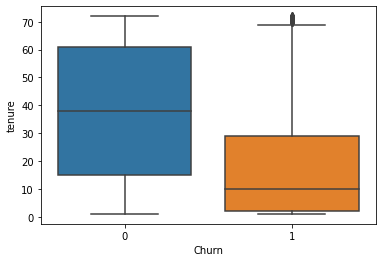

In [147]:
sns.boxplot(x="Churn", y="tenure", data=df)

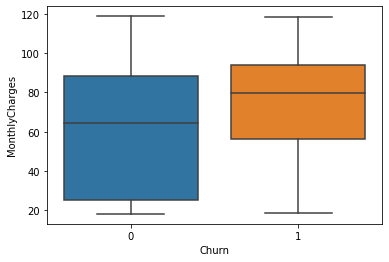

In [149]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)

Tidak terlalu banyak outlier, maka dapat menggunakan MinMaxScaler

In [151]:
scaler=MinMaxScaler()
scaler_transformer=scaler.fit(x)
x_scaled=scaler_transformer.transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled

,tenure,MonthlyCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.000000,0.115423,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.464789,0.385075,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.014085,0.354229,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.619718,0.239303,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.014085,0.521891,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.323944,0.662189,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7028,1.000000,0.845274,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
7029,0.140845,0.112935,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7030,0.042254,0.558706,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [152]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled,y,stratify=y, random_state=101, test_size=0.2)

#### LOGISTIC REGRESSION - BASELINE - SCALED

In [154]:
logreg_base=LogisticRegression(random_state=101)
logreg_base.fit(x_train,y_train)
logreg_base_pred=logreg_base.predict(x_test)

logreg_base__scaled_acc=accuracy_score(y_test, logreg_base_pred)
print(classification_report(y_test,logreg_base_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1033
           1       0.67      0.51      0.58       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [155]:
#cross-checking for over/under-fitting by predicting the train data
logreg_base.fit(x_train,y_train)
logreg_base_pred=logreg_base.predict(x_train)

print(accuracy_score(y_train, logreg_base_pred))
print(classification_report(y_train,logreg_base_pred))

0.8049777777777778
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4130
           1       0.66      0.55      0.60      1495

    accuracy                           0.80      5625
   macro avg       0.75      0.72      0.74      5625
weighted avg       0.80      0.80      0.80      5625



LOGISTIC REGRESSION - BASELINE MODEL TIDAK MENGALAMI OVER/UNDERFITTING BASED ON ACCURACY SCORE, NAMUN JUGA TIDAK BERBEDA DARI BASELINE MODEL TANPA SCALING

#### Random Forest - Baseline Model

In [156]:
rf_base=RandomForestClassifier(random_state=101)
rf_base.fit(x_train,y_train)
rf_base_pred=rf_base.predict(x_test)

rf_base_scaled_acc=accuracy_score(y_test, rf_base_pred)
print(classification_report(y_test,rf_base_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.65      0.50      0.57       374

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [157]:
#cross-checking for over/under-fitting by predicting the train data
rf_base.fit(x_train,y_train)
rf_base_pred=rf_base.predict(x_train)

print(accuracy_score(y_train, rf_base_pred))
print(classification_report(y_train,rf_base_pred))

0.9969777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4130
           1       1.00      0.99      0.99      1495

    accuracy                           1.00      5625
   macro avg       1.00      1.00      1.00      5625
weighted avg       1.00      1.00      1.00      5625



RF BASELINE MODEL MENGALAMI OVERFITTING, DITUNJUKKAN DENGAN ACCURACY SCORE 0.99 TERHADAP DATA TRAIN, SEMENTARA HANYA 0.80 UNTUK DATA TEST

#### Gradient Boosting - Baseline Model

In [158]:
gboost_base=GradientBoostingClassifier(random_state=101)
gboost_base.fit(x_train,y_train)
gboost_base_pred=gboost_base.predict(x_test)

gboost_base_scaled_acc=accuracy_score(y_test, gboost_base_pred)
print(classification_report(y_test,gboost_base_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1033
           1       0.70      0.53      0.61       374

    accuracy                           0.82      1407
   macro avg       0.77      0.73      0.74      1407
weighted avg       0.81      0.82      0.81      1407



In [159]:
#cross-checking for over/under-fitting by predicting the train data
gboost_base.fit(x_train,y_train)
gboost_base_pred=gboost_base.predict(x_train)

print(accuracy_score(y_train, gboost_base_pred))
print(classification_report(y_train,gboost_base_pred))

0.8202666666666667
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4130
           1       0.70      0.57      0.63      1495

    accuracy                           0.82      5625
   macro avg       0.78      0.74      0.75      5625
weighted avg       0.81      0.82      0.81      5625



BERDASARKAN KETIGA MODEL DI ATAS, TERLIHAT BAHWA SCALING TIDAK TERLALU MENGUBAH HASIL AKURASI DARI MASING-MASING MODEL DIBANDINGKAN DENGAN BASELINE MODELNYA TANPA SCALING.

selanjutnya akan dicoba dengan menggunakakn hyperparameter tuning

#### LOGISTIC REGRESSION - TUNING - SCALED

In [160]:
param={"penalty":["l1","l2"],
       "max_iter":[3000,5000],
       "solver": ['newton-cg', 'lbfgs', 'sag', 'saga']
                        }

gridsearch= GridSearchCV(estimator=logreg_base,
                        param_grid=param,
                         scoring="accuracy",
                         cv=5,
                         n_jobs=-1
                        )

gridsearch.fit(x_train,y_train)

gridsearch.best_params_

{'max_iter': 3000, 'penalty': 'l1', 'solver': 'saga'}

In [161]:
logreg_tuned=LogisticRegression(max_iter=3000,solver="saga",penalty="l1",random_state=101)
logreg_tuned.fit(x_train,y_train)
logreg_tuned_pred=logreg_tuned.predict(x_test)

logreg_tuned_scaled_acc=accuracy_score(y_test, logreg_tuned_pred)
print(classification_report(y_test,logreg_tuned_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1033
           1       0.66      0.51      0.57       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [162]:
logreg_tuned.fit(x_train,y_train)
logreg_tuned_pred=logreg_tuned.predict(x_train)

print(accuracy_score(y_train, logreg_tuned_pred))
print(classification_report(y_train,logreg_tuned_pred))

0.8046222222222222
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4130
           1       0.66      0.55      0.60      1495

    accuracy                           0.80      5625
   macro avg       0.75      0.72      0.74      5625
weighted avg       0.80      0.80      0.80      5625



#### Random Forest - Tuning



In [163]:
param={"max_depth":[int(x) for x in np.linspace(start=1, stop=30, num=5)],
       "n_estimators":[int(x) for x in np.linspace(start=1, stop=200, num=5)]
      }

randomsearch=RandomizedSearchCV(estimator=rf_base,
                             param_distributions=param,
                             cv=5,
                             scoring="accuracy", 
                              verbose=1,
                             n_jobs=-1)

randomsearch.fit(x_train,y_train)

randomsearch.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   16.8s finished


{'max_depth': 8, 'n_estimators': 200}

In [164]:
rf_tuned=RandomForestClassifier(max_depth=8, n_estimators=200, random_state=101)
rf_tuned.fit(x_train,y_train)
rf_tuned_pred=rf_tuned.predict(x_test)

rf_tuned__scaled_acc=accuracy_score(y_test, rf_tuned_pred)
print(classification_report(y_test,rf_tuned_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1033
           1       0.71      0.48      0.57       374

    accuracy                           0.81      1407
   macro avg       0.77      0.70      0.72      1407
weighted avg       0.80      0.81      0.80      1407



In [165]:
#cross-checking for over/under-fitting by predicting the train data
rf_tuned.fit(x_train,y_train)
rf_tuned_pred=rf_tuned.predict(x_train)

print(accuracy_score(y_train, rf_tuned_pred))
print(classification_report(y_train,rf_tuned_pred))

0.8241777777777778
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4130
           1       0.73      0.54      0.62      1495

    accuracy                           0.82      5625
   macro avg       0.79      0.73      0.75      5625
weighted avg       0.82      0.82      0.82      5625



RF - TUNED MENDAPATKAN HASIL YANG SEDIKIT LEBIH BAIK NAMUN TIDAK SIGNIFIKAN

#### Gradient Boosting - Tuning

In [166]:
param={"learning_rate":[int(x) for x in np.linspace(start=0.01, stop=1, num=3)],
       "n_estimators":[int(x) for x in np.linspace(start=100, stop=1000, num=3)],
       "max_depth":[int(x) for x in np.linspace(start=1, stop=30, num=3)]}

randomsearch=RandomizedSearchCV(estimator=gboost_base,
                             param_distributions=param,
                             cv=5,
                             scoring="accuracy", 
                              verbose=1,
                             n_jobs=-1)

randomsearch.fit(x_train,y_train)

randomsearch.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   20.5s finished


{'learning_rate': 1, 'max_depth': 1, 'n_estimators': 100}

In [167]:
gboost_tuned=GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=1, random_state=101)
gboost_tuned.fit(x_train,y_train)
gboost_tuned_pred=gboost_tuned.predict(x_test)

gboost_tuned_scaled_acc=accuracy_score(y_test, gboost_tuned_pred)
print(classification_report(y_test,gboost_tuned_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1033
           1       0.67      0.52      0.58       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



In [168]:
#cross-checking for over/under-fitting by predicting the train data
gboost_tuned.fit(x_train,y_train)
gboost_tuned_pred=gboost_tuned.predict(x_train)

print(accuracy_score(y_train, gboost_tuned_pred))
print(classification_report(y_train,gboost_tuned_pred))

0.8104888888888889
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      4130
           1       0.68      0.55      0.61      1495

    accuracy                           0.81      5625
   macro avg       0.76      0.73      0.74      5625
weighted avg       0.80      0.81      0.80      5625



TERLIHAT DILAKUKANNYA SCALING JUGA TIDAK TERLALU MERUBAH HASIL AKURASI DARI BERBAGAI MODEL INI, KECUALI UNTUK RANDOM FOREST YANG MENGALAMI SEDIKIT PENINGKATAN YANG TIDAK SIGNIFIKAN.

CONCLUSION: dari hasil percobaan berbagai model di atas, beberapa model yang terbaik adalah Gradien Boosting - Baseline Model dengan accuracy score 0.82, dimana model ini tidak mengalami overfitting setelah dicek terhadap data train maupun data test, serta tidak membutuhkan preprocessing lain (seperti pemilihan FI, SMOTE, maupun scaling).